# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat7"
layers = [n]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 3.3508918285369873
Epoch 1, Loss 3.376437187194824
Epoch 2, Loss 3.2390968799591064
Epoch 3, Loss 3.3278788328170776
Epoch 4, Loss 3.276059627532959
Epoch 5, Loss 3.35701584815979
Epoch 6, Loss 3.2705352306365967
Epoch 7, Loss 3.393200397491455
Epoch 8, Loss 3.324403166770935
Epoch 9, Loss 3.2657333612442017
Epoch 10, Loss 3.246974229812622
Epoch 11, Loss 3.247408866882324
Epoch 12, Loss 3.2365516424179077
Epoch 13, Loss 3.1922580003738403
Epoch 14, Loss 3.2069472074508667
Epoch 15, Loss 3.3098502159118652
Epoch 16, Loss 3.2351090908050537
Epoch 17, Loss 3.1268208026885986
Epoch 18, Loss 3.2120859622955322
Epoch 19, Loss 3.1906222105026245
Epoch 20, Loss 3.198506712913513
Epoch 21, Loss 3.1847325563430786
Epoch 22, Loss 3.1736230850219727
Epoch 23, Loss 3.127128005027771
Epoch 24, Loss 3.155339479446411
Epoch 25, Loss 3.0884019136428833
Epoch 26, Loss 3.1326422691345215
Epoch 27, Loss 3.150831937789917
Epoch 28, Loss 3.0819298028945923
Epoch 29, Loss 3.0938048362731934
Ep

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

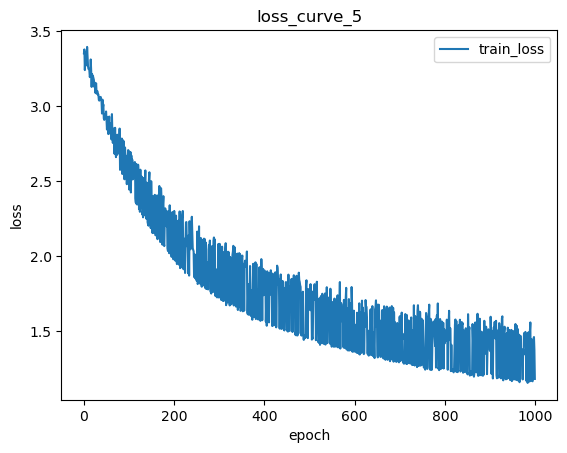

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0], [0, 15, 4, 2, 0], [3, 13, 20, 12, 3], [0, 2, 3, 15, 2], [0, 0, 0, 0, 1]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 71.42857142857143%
Accuracy for class 2 = 39.21568627450981%
Accuracy for class 3 = 68.18181818181819%
Accuracy for class 4 = 100.0%
Overall accuracy = 54.166666666666664%


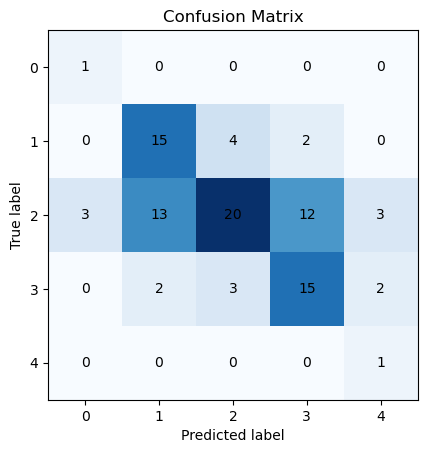

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

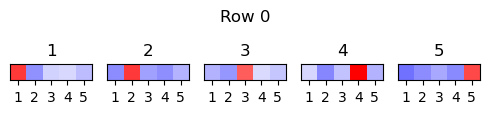

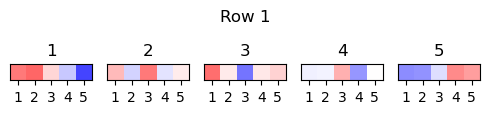

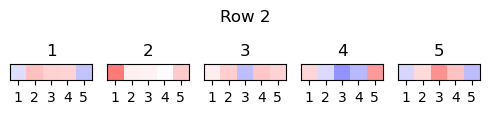

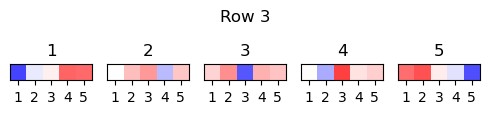

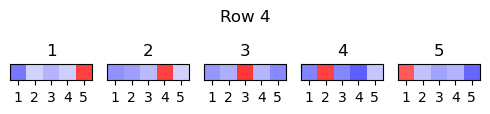

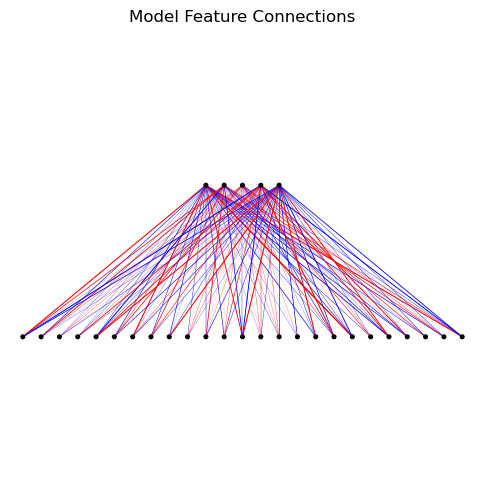

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()